In [7]:
# Загрузка датасета из Kaggle
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("dts.csv")

# Предобработка данных
df.drop_duplicates(inplace=True)
df.isnull().sum()
scaler = StandardScaler()
X = scaler.fit_transform(df.drop("DEATH_EVENT", axis=1))


# Построение модели для кластеризации методом 𝑘-средних
# Выбор количества кластеров
wcss = [] # within-cluster sum of squares
sil = [] # silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X, kmeans.labels_))



# Оптимальное количество кластеров равно 2, так как это точка излома на графике WCSS и максимальное значение на графике силуэтного коэффициента
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
df["cluster"] = labels

# Интерпретация результатов работы модели
# Анализ характеристик каждого кластера
df.groupby("cluster").mean()


# Сравнение кластеров с целевой переменной DEATH_EVENT
pd.crosstab(df["cluster"], df["DEATH_EVENT"], normalize="index")



c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

DEATH_EVENT,0,1
cluster,,
0,0.677083,0.322917
1,0.682243,0.317757


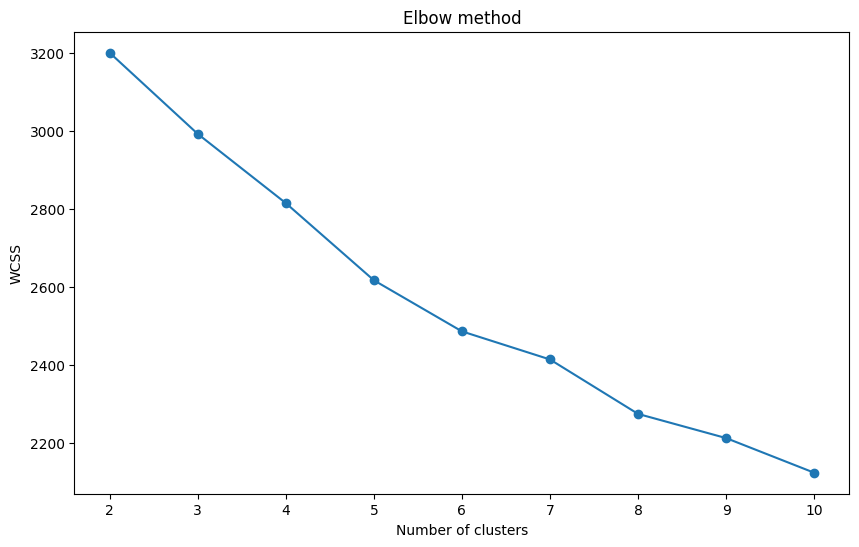

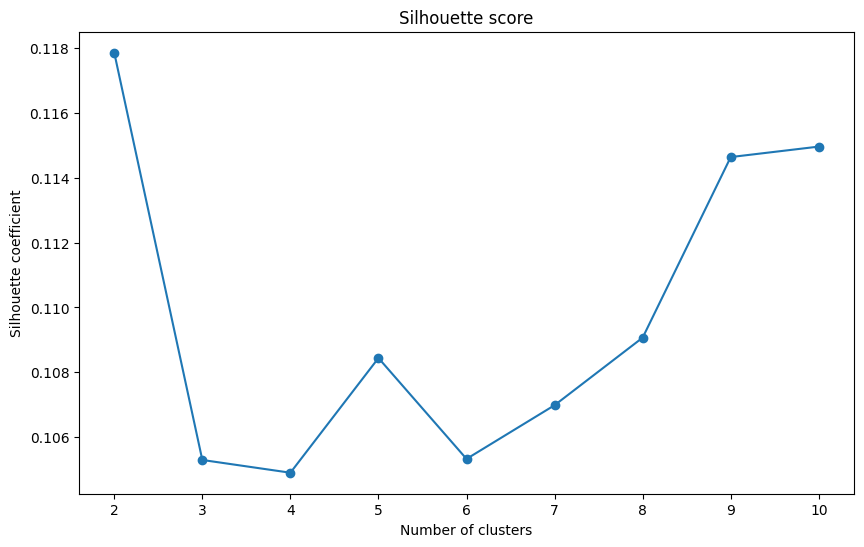

In [8]:
# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.show()

# Визуализация силуэтного коэффициента
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.title("Silhouette score")
plt.show()

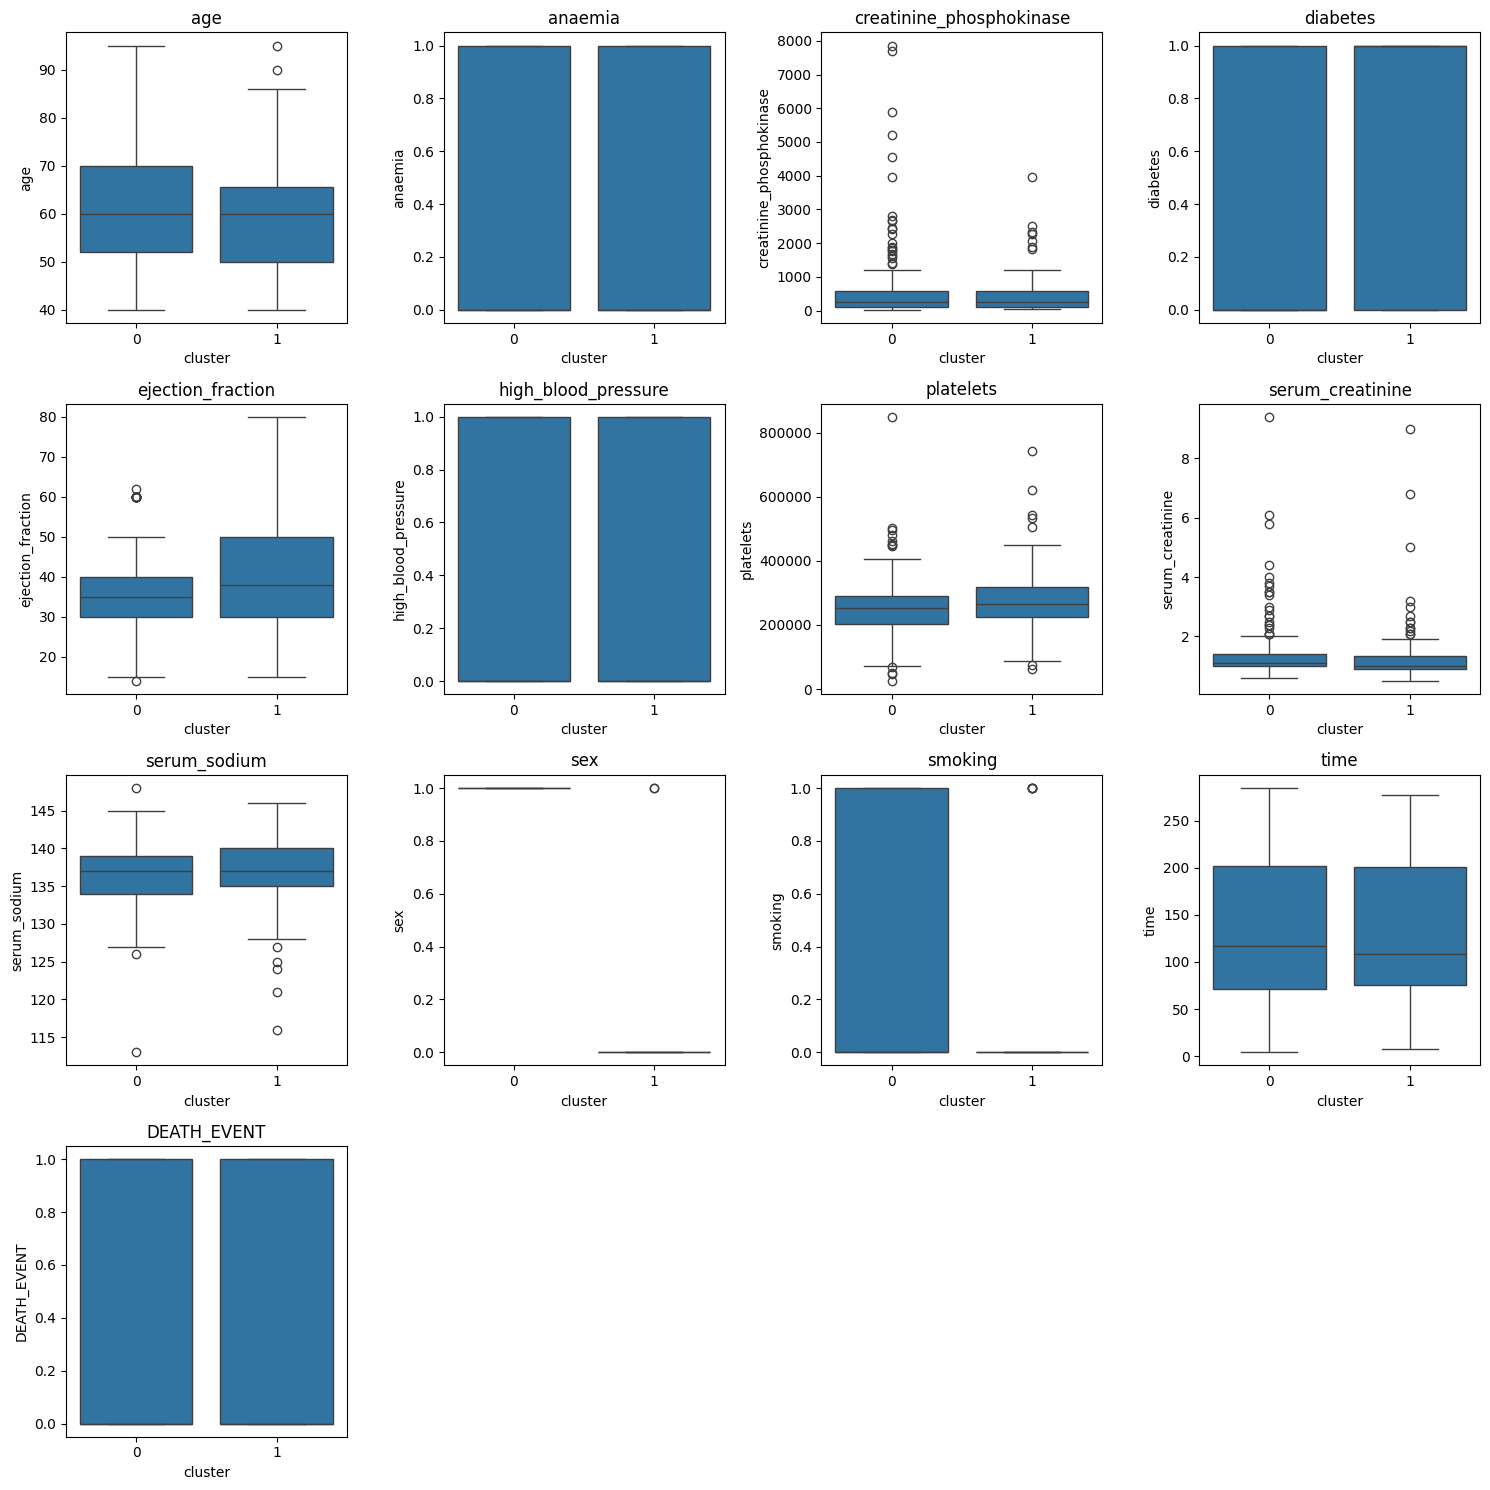

In [9]:
# Визуализация распределения признаков по кластерам
plt.figure(figsize=(15, 15))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x="cluster", y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()